In [27]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# Defining file paths
hp_path = 'raw-datasets/hof_pitchers.xlsx'
nhp_path = 'raw-datasets/non-hof_pitchers.xlsx'
hh_path = 'raw-datasets/hof_hitters.xlsx'
nhh_path = 'raw-datasets/non-hof_hitters.xlsx'

# Reading files into dataframes
hof_pitchers = pd.read_excel(hp_path)
non_hof_pitchers = pd.read_excel(nhp_path)
hof_hitters = pd.read_excel(hh_path)
non_hof_hitters = pd.read_excel(nhh_path)

# Verifying dataframes have been loaded
print(hof_pitchers.head())
print(non_hof_pitchers.head())
print(hof_hitters.head())
print(non_hof_pitchers.head())

   Rk            Player  From    To    Age    W    L   W-L%  Dec   ERA  ...  \
0   1  Grover Alexander  1911  1930  24-43  373  208  0.642  581  2.56  ...   
1   2         Cap Anson  1871  1897  19-45    0    1  0.000    1  4.50  ...   
2   3      Jake Beckley  1888  1907  20-39    0    1  0.000    1  6.75  ...   
3   4    Cool Papa Bell  1922  1946  19-43   20   15  0.571   35  4.53  ...   
4   5    Charles Bender  1903  1925  19-41  212  127  0.625  339  2.46  ...   

    ERA+    FIP   WHIP    H9  HR9  BB9  SO9  SO/BB        Pos  \
0  135.0   2.82  1.121   8.4  0.3  1.6  3.8   2.31       1/H7   
1   89.0  10.76  1.500   9.0  4.5  4.5  2.3   0.50  *35O24/61   
2   50.0   2.42  2.500  20.3  0.0  2.3  4.5   2.00    *3/O14H   
3   98.0   3.82  1.392   9.8  0.5  2.7  4.2   1.55  *8713/945   
4  112.0   2.29  1.113   7.9  0.1  2.1  5.1   2.40   1H/38745   

                  Team  
0          CHC,PHI,STL  
1          ATH,CHC,ROK  
2  CIN,NYG,PBB,PIT,STL  
3     CAG,DW,HG,PC,SLS  
4      BA

# ~~~~HITTERS~~~~

In [35]:
# Defining features for hitters
hitters_features = ['Player','From','To','G','PA','H','1B','2B','3B','HR','RBI','BA','OBP','SLG','OPS','OPS+','TB']

# Combining dataframes and adding "HoF" column
hof_hitters['HoF'] = 1
non_hof_hitters['HoF'] = 0
hitters_combined = pd.concat([hof_hitters,non_hof_hitters])

X_hitters = hitters_combined[hitters_features]
y_hitters = hitters_combined['HoF']

# Verifying
print(hitters_combined.head())
print(hitters_combined.tail())

   Rk            Player  From    To    Age     G     PA     AB     R     H  \
0   1       Henry Aaron  1954  1976  20-42  3298  13941  12364  2174  3771   
1   2  Grover Alexander  1911  1930  24-43   703   1981   1810   154   378   
2   3    Roberto Alomar  1988  2004  20-36  2379  10400   9073  1508  2724   
3   4         Cap Anson  1871  1897  19-45  2524  11331  10281  1999  3435   
4   5     Luis Aparicio  1956  1973  22-39  2599  11231  10230  1335  2677   

   ...   OPS+    TB   GIDP   HBP     SH     SF    IBB        Pos  \
0  ...  155.0  6856  328.0  32.0   21.0  121.0  293.0  *9837H4/5   
1  ...   43.0   497    NaN   2.0   88.0    NaN    0.0       1/H7   
2  ...  116.0  4018  206.0  50.0  148.0   97.0   62.0     *4HD/6   
3  ...  142.0  4592    6.0  32.0   34.0    NaN    NaN  *35O24/61   
4  ...   82.0  3504  184.0  27.0  161.0   76.0   22.0        *6H   

                          Team  HoF  
0                  ATL,MIL,MLN    1  
1                  CHC,PHI,STL    1  
2  ARI,B

In [36]:
# Splitting the data
X_train_hitters, X_test_hitters, y_train_hitters, y_test_hitters = train_test_split(X_hitters.drop(columns=['Player','From','To']), y_hitters, test_size=0.2, random_state=69)

# Displaying the shapes of the datasets
print(f"X_train shape: {X_train_hitters.shape}")
print(f"X_test shape: {X_test_hitters.shape}")
print(f"y_train shape: {y_train_hitters.shape}")
print(f"y_test shape: {y_test_hitters.shape}")

X_train shape: (5900, 14)
X_test shape: (1475, 14)
y_train shape: (5900,)
y_test shape: (1475,)


In [22]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled_hitters = scaler.fit_transform(X_train_hitters)
X_test_scaled_hitters = scaler.transform(X_test_hitters)

# Imputing missing values
imputer = IterativeImputer(random_state=0)
X_train_imputed_hitters = imputer.fit_transform(X_train_scaled_hitters)
X_test_imputed_hitters = imputer.transform(X_test_scaled_hitters)

In [23]:
# Fitting SVM model on imputed data
hitters_svm_model = svm.SVC(kernel='linear')
hitters_svm_model.fit(X_train_imputed_hitters, y_train_hitters)

# Printing the SVM model
print(hitters_svm_model)

SVC(kernel='linear')


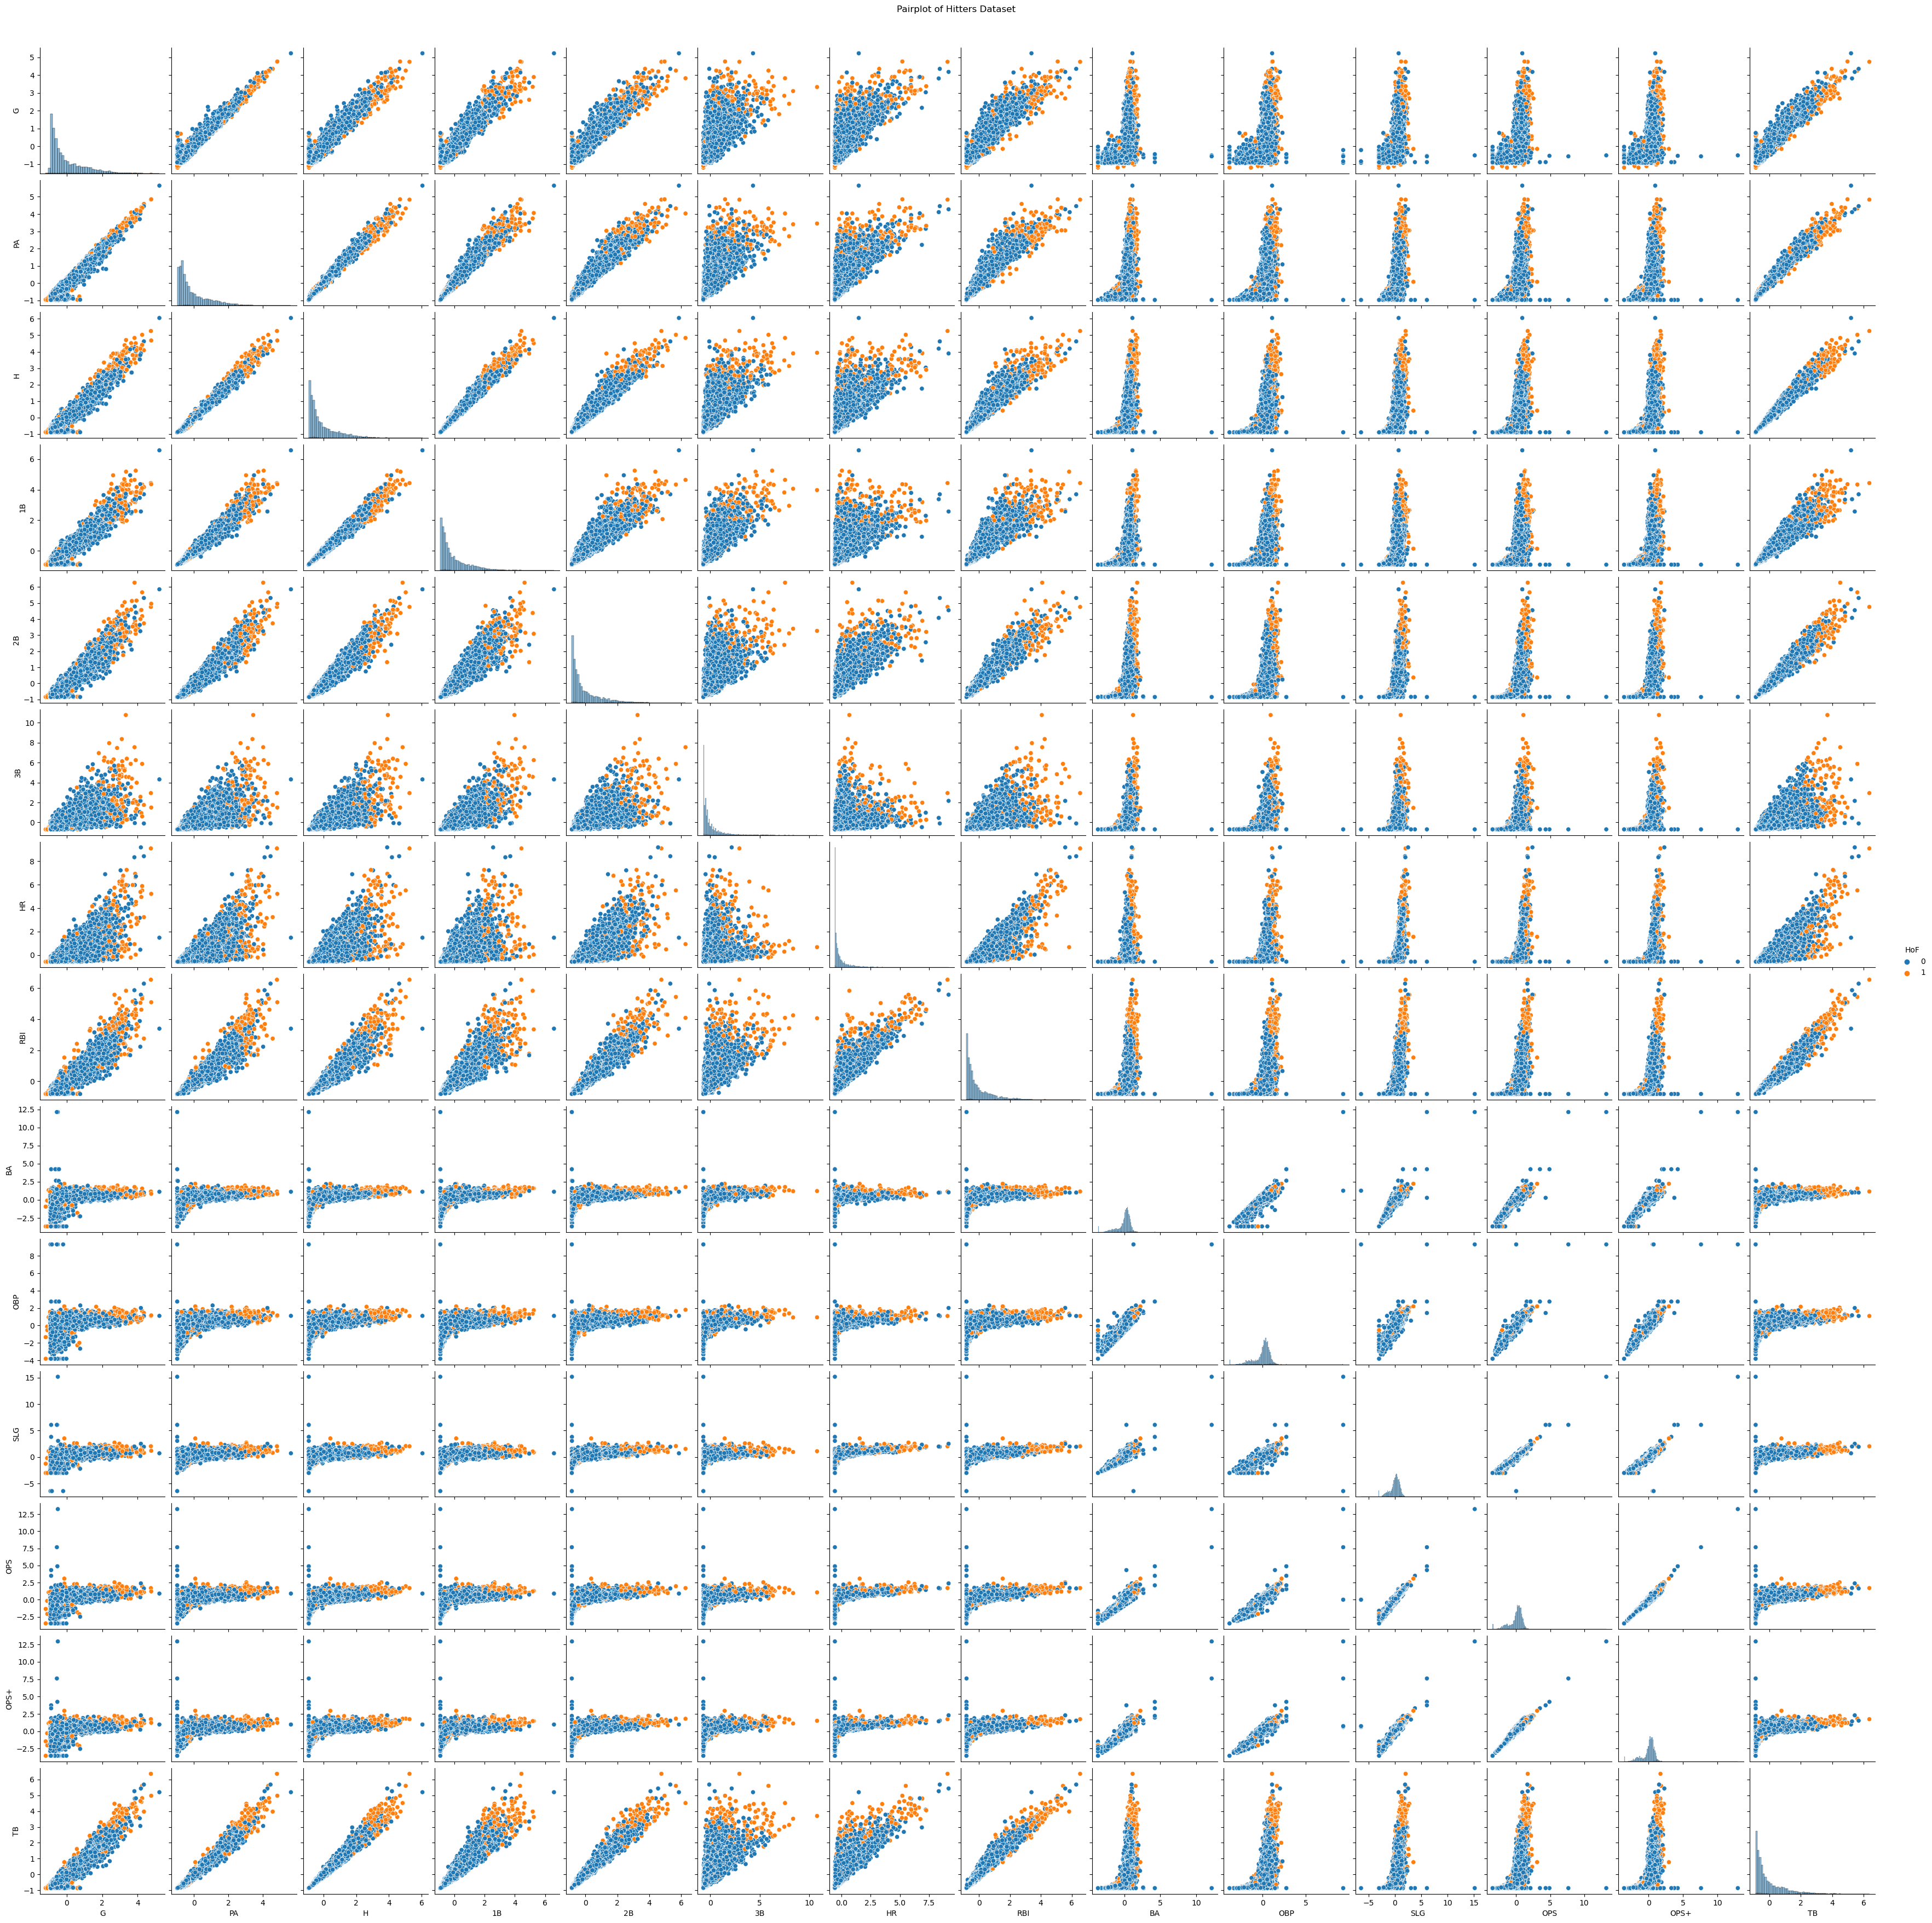

In [47]:
# Creating and combining data
X_train_imputed_hitters_df = pd.DataFrame(X_train_imputed_hitters, columns=X_train_hitters.columns)
train_data_hitters = pd.concat([X_train_imputed_hitters_df, y_train_hitters.reset_index(drop=True)], axis=1)

# Ignoring future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Pairplot
sns.pairplot(train_data_hitters, hue='HoF', diag_kind='hist')
plt.suptitle('Pairplot of Hitters Dataset', y=1.01)
plt.savefig('hitters_pairplot.png')
plt.show()

# ~~~~PITCHERS~~~~

In [39]:
# Defining features for pitchers
pitchers_features = ['Player','From','To','G','ERA','IP','ERA+','FIP','WHIP','H9','BB9','SO9','SO/BB']

# Combining dataframes and adding "HoF" column
hof_pitchers['HoF'] = 1
non_hof_pitchers['HoF'] = 0
pitchers_combined = pd.concat([hof_pitchers,non_hof_pitchers])

X_pitchers = pitchers_combined[pitchers_features]
y_pitchers = pitchers_combined['HoF']

# Verifying
print(pitchers_combined.head())
print(pitchers_combined.tail())

   Rk            Player  From    To    Age    W    L   W-L%  Dec   ERA  ...  \
0   1  Grover Alexander  1911  1930  24-43  373  208  0.642  581  2.56  ...   
1   2         Cap Anson  1871  1897  19-45    0    1  0.000    1  4.50  ...   
2   3      Jake Beckley  1888  1907  20-39    0    1  0.000    1  6.75  ...   
3   4    Cool Papa Bell  1922  1946  19-43   20   15  0.571   35  4.53  ...   
4   5    Charles Bender  1903  1925  19-41  212  127  0.625  339  2.46  ...   

    WHIP    H9  HR9  BB9  SO9  SO/BB        Pos                 Team  HoF  G.1  
0  1.121   8.4  0.3  1.6  3.8   2.31       1/H7          CHC,PHI,STL    1  NaN  
1  1.500   9.0  4.5  4.5  2.3   0.50  *35O24/61          ATH,CHC,ROK    1  NaN  
2  2.500  20.3  0.0  2.3  4.5   2.00    *3/O14H  CIN,NYG,PBB,PIT,STL    1  NaN  
3  1.392   9.8  0.5  2.7  4.2   1.55  *8713/945     CAG,DW,HG,PC,SLS    1  NaN  
4  1.113   7.9  0.1  2.1  5.1   2.40   1H/38745      BAL,CHW,PHA,PHI    1  NaN  

[5 rows x 39 columns]
        Rk      

In [40]:
# Splitting the data
X_train_pitchers, X_test_pitchers, y_train_pitchers, y_test_pitchers = train_test_split(X_pitchers.drop(columns=['Player','From','To']), y_pitchers, test_size=0.2, random_state=69)

# Displaying the shapes of the datasets
print(f"X_train shape: {X_train_pitchers.shape}")
print(f"X_test shape: {X_test_pitchers.shape}")
print(f"y_train shape: {y_train_pitchers.shape}")
print(f"y_test shape: {y_test_pitchers.shape}")

X_train shape: (2146, 10)
X_test shape: (537, 10)
y_train shape: (2146,)
y_test shape: (537,)


In [41]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled_pitchers = scaler.fit_transform(X_train_pitchers)
X_test_scaled_pitchers = scaler.transform(X_test_pitchers)

# Imputing missing values
imputer = IterativeImputer(random_state=0)
X_train_imputed_pitchers = imputer.fit_transform(X_train_scaled_pitchers)
X_test_imputed_pitchers = imputer.transform(X_test_scaled_pitchers)

In [42]:
# Fitting SVM model on imputed data
pitchers_svm_model = svm.SVC(kernel='linear')
pitchers_svm_model.fit(X_train_imputed_pitchers, y_train_pitchers)

# Printing the SVM model
print(pitchers_svm_model)

SVC(kernel='linear')


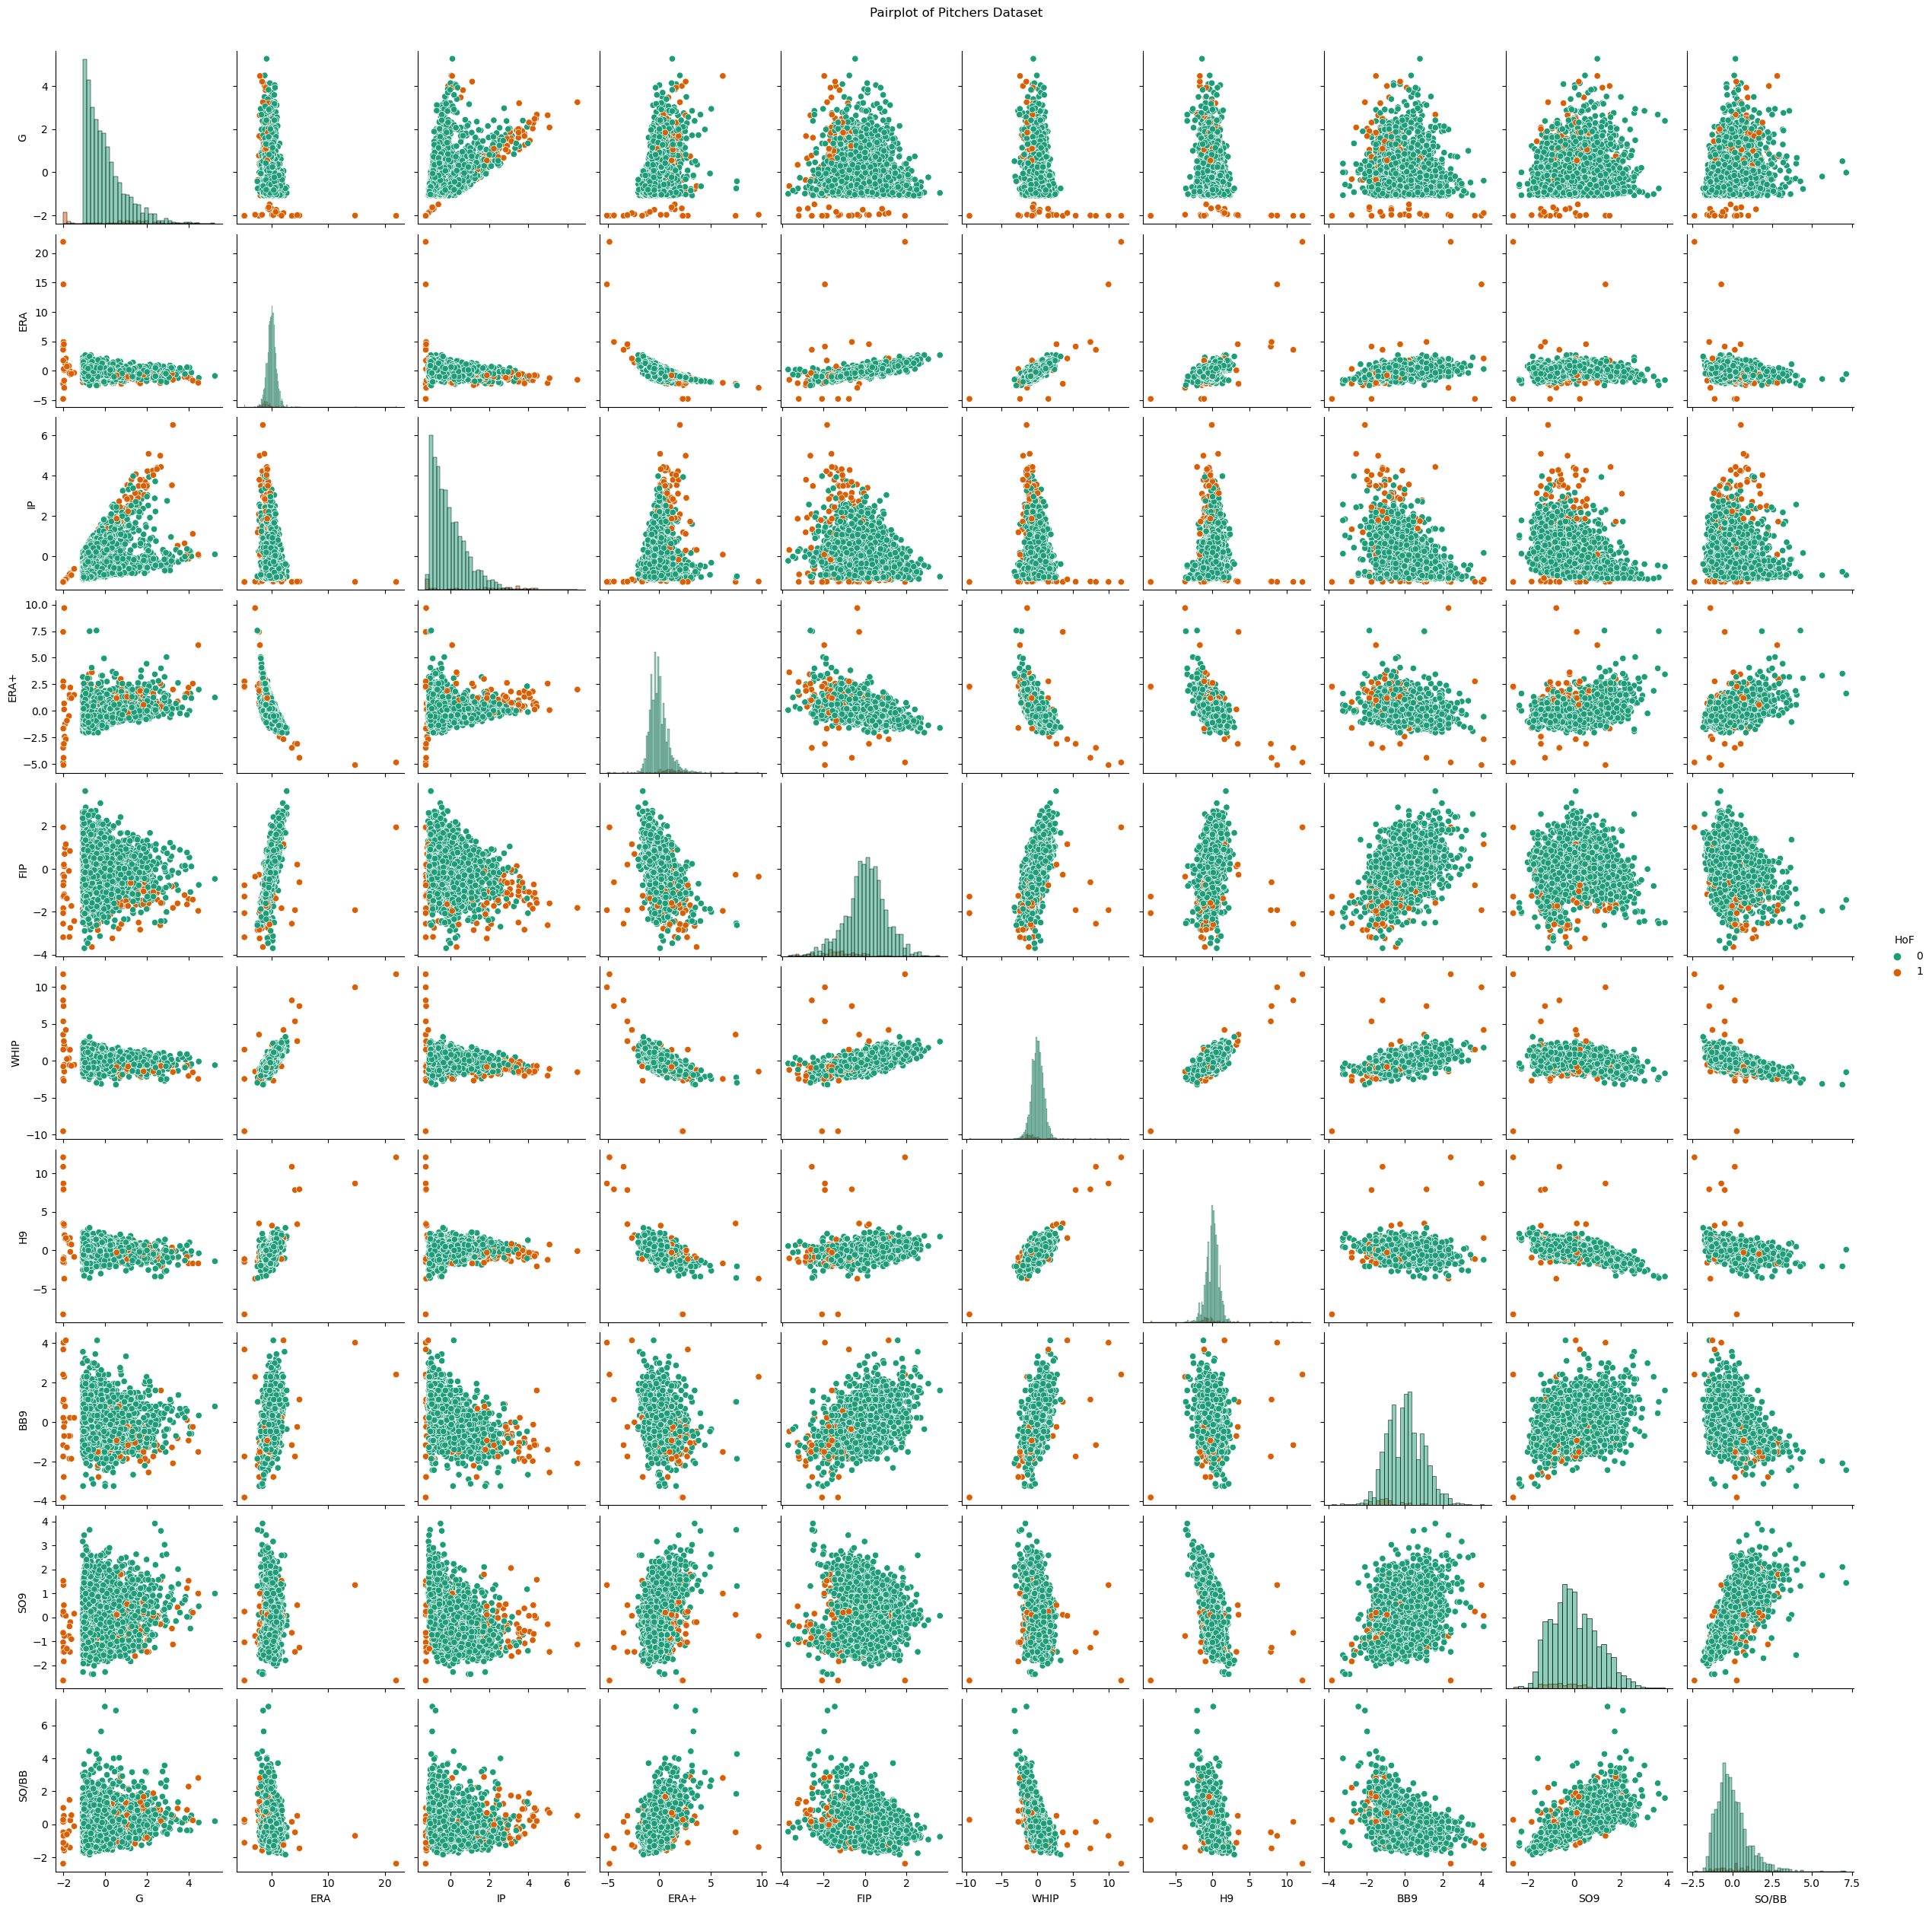

In [49]:
# Creating and combining data
X_train_imputed_pitchers_df = pd.DataFrame(X_train_imputed_pitchers, columns=X_train_pitchers.columns)
train_data_pitchers = pd.concat([X_train_imputed_pitchers_df, y_train_pitchers.reset_index(drop=True)], axis=1)

# Ignoring future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Pairplot
sns.pairplot(train_data_pitchers, hue='HoF', diag_kind='hist', palette="Dark2")
plt.suptitle('Pairplot of Pitchers Dataset', y=1.01)
plt.savefig('pitchers_pairplot.png')
plt.show()